In [16]:
from mlxtend.data import loadlocal_mnist
import numpy as np
from numpy import linalg as LA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

In [17]:
class PCA:
    def __init__(self, data):
        self.data = data
        self.mean = np.mean(self.data, axis=1)
        self.mean = self.mean[:, np.newaxis]
        data_Norm = self.data - self.mean
        self.COV = np.cov(data_Norm)
        self.w, self.v = LA.eig(self.COV)

    def reducedEIGSPACE(self, dim):
        return self.v[:, 0:dim]

    def Projection(self, Samples, v_reduced):
        Samples_norm = Samples - self.mean
        temp = np.empty((min(v_reduced.shape), Samples.shape[1]))
        for i in range(Samples.shape[1]):
            temp[:, i] = np.dot(np.transpose(v_reduced), Samples_norm[:, i])
        return temp

    def Inv_Projection(self, com_data, v_reduced):
        temp = np.empty((max(v_reduced.shape), com_data.shape[1]))
        for i in range(com_data.shape[1]):
            temp[:, i] = np.dot(v_reduced, com_data[:, i])
        return temp


In [18]:
class KNN:
    def __init__(self, data_train, label_train, test_data, test_label):
        self.data_train = np.transpose(data_train)
        self.label_train = np.transpose(label_train)
        self.test_data = np.transpose(test_data)
        self.test_label = np.transpose(test_label)

    def VariableK(self, max_k):
        k_range = range(1, max_k)
        scores = []
        scores_list = []
        Classification_time = []
        for k in k_range:
            start_time = time.time()
            Classifier = KNeighborsClassifier(n_neighbors=k)
            Classifier.fit(self.data_train, self.label_train)
            y_predict = Classifier.predict(self.test_data)
            scores_list.append(metrics.accuracy_score(self.test_label, y_predict))
            Classification_time.append(time.time() - start_time)

        # Plotting accuracy vs K
        return scores_list, Classification_time

    def FixedK(self, k):
        Classifier = KNeighborsClassifier(n_neighbors=k)
        Classifier.fit(self.data_train, self.label_train)
        y_predict = Classifier.predict(self.test_data)
        score = metrics.accuracy_score(self.test_label, y_predict)
        return score

    

In [19]:
# Function to plot images
def PlotImg(ImgVector, name):
    img = ImgVector.reshape(28, 28)
    plt.imsave(str(name) + '.png', img, cmap='gray')



In [20]:
# Importing the training data
X, y = loadlocal_mnist(images_path='/media/bharath/Storage/UTSPRING2020/MACHINE_LEARNING/ASSIGNMENT_1/train-images'
                                   '-idx3-ubyte',
                       labels_path='/media/bharath/Storage/UTSPRING2020/MACHINE_LEARNING/ASSIGNMENT_1/train-labels'
                                   '-idx1-ubyte')
# Importing the testing data
X_test, y_test = loadlocal_mnist(images_path='/media/bharath/Storage/UTSPRING2020/MACHINE_LEARNING/ASSIGNMENT_1/t10k'
                                             '-images-idx3-ubyte',
                                 labels_path='/media/bharath/Storage/UTSPRING2020/MACHINE_LEARNING/ASSIGNMENT_1/t10k'
                                             '-labels-idx1-ubyte')


In [21]:
# Choosing first 10000 training images
X = X[0:10000, :]
y = y[0:10000]
X_test = X_test[0:5000, :]
y_test = y_test[0:5000]

# Each Column Vector is an image of 784 pixels
X = np.transpose(X)
X_test = np.transpose(X_test)

In [22]:
MyKNN = KNN(X, y, X_test, y_test)
result, time_WO_PCA = MyKNN.VariableK(10)
k_range = range(1, 11)

In [23]:
MyPCA = PCA(X)
V_red = MyPCA.reducedEIGSPACE(50)
X_train_pca = MyPCA.Projection(X, V_red)
X_test_pca = MyPCA.Projection(X_test, V_red)
MyKNN2 = KNN(X_train_pca, y, X_test_pca, y_test)
scores_list, time_w_PCA = MyKNN2.VariableK(10)

/home/bharath/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


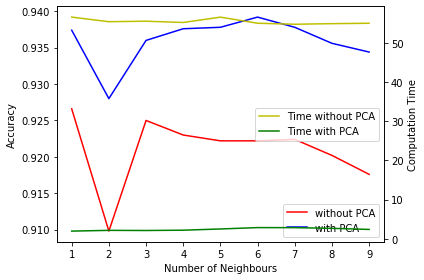

In [34]:
k_range = range(1,10)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of Neighbours')
ax1.set_ylabel('Accuracy')
ax1.plot(k_range, result, 'r', label='without PCA')
ax1.plot(k_range, scores_list, 'b', label='with PCA')
ax1.legend(loc="best")

ax2 = ax1.twinx()
ax2.set_ylabel('Computation Time')
ax2.plot(k_range, time_WO_PCA, 'y', label='Time without PCA')
ax2.plot(k_range, time_w_PCA, 'g', label='Time with PCA')
ax2.legend(loc="best")
fig.tight_layout()
plt.savefig('FIG7.png')
